# Analysis consanguinity map owners and employees

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Datasets

In [3]:
main_path = "/home/juan.russy/shared/FamilyNetwork/"

### 1.1 Citizens

In [4]:
filepath_raw = '/home/juan.russy/shared/FamilyNetwork/RegCleaned.tsv'


def load_registry(filepath_raw, NROWS=None):
    """ Load original dataset with cedula and nombre information

    Args:
        filepath_raw : path with original dataframe file
        NROWS : Argument for number of rows in read_csv

    Returns:
        rf : dataframe with cedula and nombre columns
    """
    cols_interest = ['cedula', 'dt_birth', 'dt_death',
                    'gender', 'is_citizen', 'marital_status']
    reg_cleaned = pd.read_csv(  filepath_raw,
                                sep='\t',
                                encoding='latin-1',
                                usecols=cols_interest,
                                keep_default_na=False,
                                nrows=NROWS
                                )
    return reg_cleaned

rf = load_registry(filepath_raw, NROWS=None)
rf['dt_birth'] = pd.to_datetime(
    rf['dt_birth'], format=r'%Y-%m-%d')
rf['dt_death'] = rf['dt_death'].replace('//', np.nan)
rf['dt_death'] = pd.to_datetime(
    rf['dt_death'], format=r'%Y-%m-%d')

### 1.2 Owners

In [5]:
consanguinity = '/home/juan.russy/shared/FamilyNetwork/consangunity_map_owners_6.tsv'
consang = pd.read_csv(consanguinity, sep='\t', encoding='utf-8', 
                        usecols = ['degree_separation', 'cedula_reference', 'cedula'],
                        nrows=None)

In [7]:
consang.cedula_reference.unique().shape

(356852,)

In [8]:
ref_count = pd.DataFrame(consang.cedula_reference.value_counts())

In [9]:
consang

,degree_separation,cedula,cedula_reference
0,0,0000233aaa95d489,0000233aaa95d489
1,0,23bdf3e2257a05c5,0000233aaa95d489
2,1,85190b46db53c502,0000233aaa95d489
3,1,b6c29102abe724a8,0000233aaa95d489
4,1,b842ec19d02ca42d,0000233aaa95d489
...,...,...,...
74331268,6,f7811ef1a01e87d0,fffffc843f9e2bf5
74331269,6,faf073408cc425e6,fffffc843f9e2bf5
74331270,6,21e063e665845148,fffffc843f9e2bf5
74331271,6,23b400871549aa8b,fffffc843f9e2bf5


### 1.3 Employees

In [ ]:
consanguinity = '/home/juan.russy/shared/FamilyNetwork/consangunity_map_employees_6.tsv'
consang = pd.read_csv(  consanguinity, sep='\t', encoding='utf-8',
                        usecols=['degree_separation',
                                'cedula_reference', 'cedula'],
                        nrows=None)

In [ ]:
consang.cedula_reference.unique().shape

In [ ]:
ref_count = pd.DataFrame(consang.cedula_reference.value_counts())

## 2. Invariates Analysis

In [111]:
# Owners with more and less than 100 relatives
ref_count_less_100 = ref_count[ref_count.cedula_reference < 100].index.tolist()
ref_count_more_100 = ref_count[ref_count.cedula_reference >= 100].index.tolist()

In [112]:
# Filter by owners
rf_less_100 = rf[rf.cedula.isin(ref_count_less_100)]
rf_more_100 = rf[rf.cedula.isin(ref_count_more_100)]

In [180]:
len(ref_count_less_100)
len(ref_count_more_100)


246050

In [113]:
dif_len = len(ref_count_less_100) - len(rf_less_100)
print('Difference in length less 100: {}'.format(dif_len))
dif_len = len(ref_count_more_100) - len(rf_more_100)
print('Difference in length more 100: {}'.format(dif_len))

Difference in length less 100: 129
Difference in length more 100: 22


### 2.1 Date of birth

In [68]:
rf_less_100['year_birth'] = rf_less_100['dt_birth'].dt.year
rf_more_100['year_birth'] = rf_more_100['dt_birth'].dt.year

/home/juan.russy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/juan.russy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
print('Min rf_less_100 year birth:', min(rf_less_100.year_birth), ', Max rf_less_100 year birth:', max(rf_less_100.year_birth))
print('Min rf_more_100 year birth:', min(rf_more_100.year_birth), ', Max rf_more_100 year birth:', max(rf_more_100.year_birth))

Min rf_less_100 year birth: 1912 , Max rf_less_100 year birth: 2001
Min rf_more_100 year birth: 1914 , Max rf_more_100 year birth: 2000


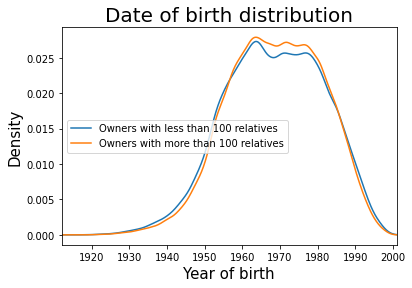

In [79]:
# Plot density of dt_birth
rf_less_100["year_birth"].plot.density(
    xlim=(1912, 2001))
# Add density plot dt_birth for rf_more_100
rf_more_100["year_birth"].plot.density(
    xlim=(1912, 2001))
plt.legend(['Owners with less than 100 relatives', 'Owners with more than 100 relatives'])
plt.title('Date of birth distribution', fontsize=20)
plt.xlabel('Year of birth', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.savefig(main_path+'owners_dt_birth_distribution.png', dpi=300)

In [ ]:
rf_less_100.drop(['dt_birth', 'year_birth'], axis=1, inplace=True)
rf_more_100.drop(['dt_birth', 'year_birth'], axis=1, inplace=True)

### 2.2 Date of death

In [121]:
num_not_death = rf_less_100.dt_death.isna().sum()
print(  'Proportion of owners with not death date (less 100):',
        num_not_death/len(rf_less_100), 'Total death:', len(rf_less_100) - num_not_death)
num_not_death = rf_more_100.dt_death.isna().sum()
print(  'Proportion of owners with not death date (more 100):',
        num_not_death/len(rf_more_100), 'Total death:', len(rf_more_100) - num_not_death)


Proportion of owners with not death date (less 100): 0.9770223993205208 Total death: 2543
Proportion of owners with not death date (more 100): 0.9805997691319687 Total death: 4773


In [122]:
year_death_less_100 = rf_less_100['dt_death'].dropna().dt.year
year_death_more_100 = rf_more_100['dt_death'].dropna().dt.year

In [127]:
print('Min rf_less_100 year death:', min(year_death_less_100), ', Max rf_less_100 year death:', max(year_death_less_100))
print('Min rf_more_100 year death:', min(year_death_more_100), ', Max rf_more_100 year death:', max(year_death_more_100))

Min rf_less_100 year death: 2005 , Max rf_less_100 year death: 2021
Min rf_more_100 year death: 2008 , Max rf_more_100 year death: 2021


KeyboardInterrupt: 

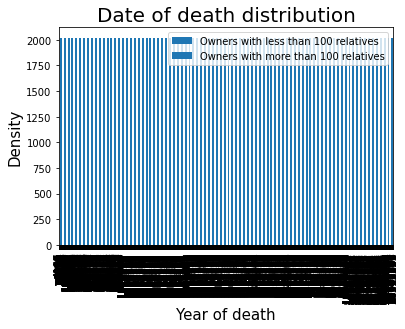

In [188]:
year_death_less_100.plot.density(xlim=(2005, 2021))
year_death_more_100.plot.density(xlim=(2005, 2021))
plt.legend(['Owners with less than 100 relatives',
            'Owners with more than 100 relatives'])
plt.title('Date of death distribution', fontsize=20)
plt.xlabel('Year of death', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.savefig(main_path+'owners_dt_death_distribution.png', dpi=300)

### 2.3 Gender

- Gender 0: Women
- Gender 1: Men

In [156]:
rf_less_100.gender.value_counts(normalize=True)

1    0.592114
0    0.407886
Name: gender, dtype: float64

In [157]:
rf_more_100.gender.value_counts(normalize=True)

1    0.614402
0    0.385598
Name: gender, dtype: float64

### 2.4 Citizenship

In [158]:
rf_less_100.is_citizen.value_counts(normalize=True)

1    0.960939
0    0.039061
Name: is_citizen, dtype: float64

In [159]:
rf_more_100.is_citizen.value_counts(normalize=True)

1    0.996147
0    0.003853
Name: is_citizen, dtype: float64

### 2.5 Marital status

In [173]:
marital_status = rf_less_100.marital_status.value_counts(normalize=True).reset_index(drop=False)
marital_status.columns = ['marital_status', 'less_100']
marital_status['more_100'] = rf_more_100.marital_status.value_counts(normalize=True).tolist()

In [176]:
# Wide to long format marital_status dataframe
marital_status = pd.melt(marital_status, id_vars=['marital_status'], value_vars=['less_100', 'more_100'])

In [ ]:
import seaborn as sns
sns.barplot(x='marital_status', y='value', hue='variable', data=marital_status)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Proportion of owners', fontsize=15)
plt.title('Marital status by type of owner', fontsize=20)
plt.savefig(main_path + 'marital_status_by_type_of_owner.png', dpi=300)

## 3. Plot Less than 100 relatives

In [26]:
ref_count_less_100 = ref_count[ref_count.cedula_reference < 100]
consang_less_100 = consang[consang.cedula_reference.isin(ref_count_less_100.index)]

In [28]:
consang_less_100.cedula_reference.unique().shape

(110802,)

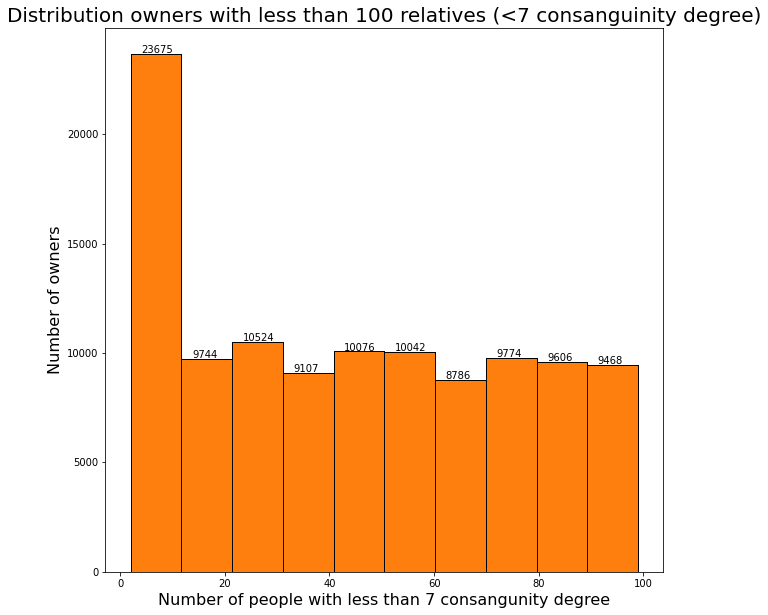

In [14]:
ax = ref_count_less_100.plot.hist(  bins=10, 
                                    figsize=(10, 10), 
                                    edgecolor='black',
                                    legend=False)

# Get the counts and bin edges from the histogram
counts, bins, _ = ax.hist(ref_count_less_100['reference'], 
                            bins=10, edgecolor='black')
ax.set_title('Distribution owners with less than 100 relatives (<7 consanguinity degree)',
                fontsize=20)
ax.set_xlabel('Number of people with less than 7 consangunity degree',
                fontsize=16)
ax.set_ylabel('Number of owners', fontsize=16)

# Add labels to each bar
for i in range(len(counts)):
    plt.text(bins[i] + 2, counts[i] + 40, str(int(counts[i])))

path_100 = '/home/juan.russy/shared/FamilyNetwork/people_6_degree_less_100.png'
plt.savefig(path_100, dpi=300, bbox_inches='tight')


## 4. Plot More than or equal to 100 relatives

In [54]:
ref_count_more_100 = ref_count[ref_count.cedula_reference >= 100]
# ref_count_more_100 = ref_count_more_100[ref_count_more_100.cedula_reference < 200]
consang_more_100 = consang[consang.cedula_reference.isin(ref_count_more_100.index)]

In [55]:
consang_more_100.head()

,degree_separation,cedula,cedula_reference
4429,0,00033d61e03dfe50,00033d61e03dfe50
4430,0,cb09e015612c8d04,00033d61e03dfe50
4431,1,d42f29a5ccd3c327,00033d61e03dfe50
4432,1,860efdad0586544a,00033d61e03dfe50
4433,1,5d1f4ff565737aa2,00033d61e03dfe50
...,...,...,...
74331268,6,f7811ef1a01e87d0,fffffc843f9e2bf5
74331269,6,faf073408cc425e6,fffffc843f9e2bf5
74331270,6,21e063e665845148,fffffc843f9e2bf5
74331271,6,23b400871549aa8b,fffffc843f9e2bf5


In [41]:
consang_more_100.cedula_reference.unique().shape

(198891,)

In [57]:
consang_more_100[consang_more_100.cedula_reference=="fffffc843f9e2bf5"].shape

(108, 3)

Cedulas that are use in the examples:

- 0000233aaa95d489
- fffffc843f9e2bf5

Use /home/juan.russy/shared/namegraph/src/graph/consanguinity_one_node.py

### Grafica

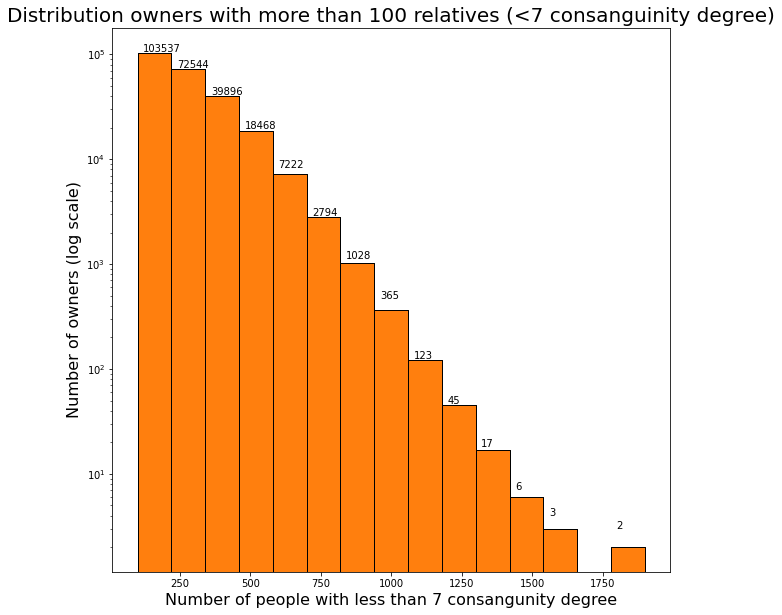

In [43]:
BINS = 15
ax = ref_count_more_100.plot.hist(  bins=BINS,
                                    figsize=(10, 10),
                                    edgecolor='black',
                                    legend=False,
                                    log=True)
# Get the counts and bin edges from the histogram
counts, bins, _ = ax.hist(ref_count_more_100['reference'],
                            bins=BINS, edgecolor='black')
ax.set_title('Distribution owners with more than 100 relatives (<7 consanguinity degree)',
                fontsize=20)
ax.set_xlabel('Number of people with less than 7 consangunity degree',
                fontsize=16)
ax.set_ylabel('Number of owners (log scale)', fontsize=16)

# Add labels to each bar
for i in range(len(counts)):
    if i == 13:
        continue
    elif i < 15 and i > 7:
        sumy = 1
    elif i < 5:
        sumy=1000
    else:
        sumy=100
    plt.text(bins[i] + 20, counts[i]+sumy, str(int(counts[i])))

path_100 = '/home/juan.russy/shared/FamilyNetwork/people_6_degree_more_100.png'
plt.savefig(path_100, dpi=300, bbox_inches='tight')


## 5. Density of relatives at each degree

In [118]:
groupby_cols = ['cedula_reference', 'degree_separation']
density_relatives = consang.groupby(groupby_cols).count().reset_index(drop=False)

In [119]:
# Remove cedula_reference with only one relative (degree 0)
value_count = pd.DataFrame(density_relatives.cedula_reference.value_counts()).reset_index(drop=False)
value_count = value_count[value_count.cedula_reference ==1]
density_relatives = density_relatives[~density_relatives.cedula_reference.isin(
    value_count['index'])]

In [124]:
density_relatives_2 = density_relatives.copy()
# Substract one to degree_separation and remove negative values
density_relatives_2['degree_separation'] = density_relatives_2['degree_separation'] - 1
density_relatives_2 = density_relatives_2[density_relatives_2['degree_separation'] >= 0].reset_index(
    drop=True)
density_relatives_2 = density_relatives_2.rename(
    columns={'cedula': 'cedula_2'})


In [130]:
# Inner join
density_relatives = density_relatives.merge(density_relatives_2, on=['cedula_reference', 'degree_separation'], how='inner')

In [135]:
density_relatives['ratio'] = density_relatives['cedula_2'] / density_relatives['cedula']

In [139]:
density_relatives = density_relatives[['degree_separation', 'ratio']]

,cedula_reference,degree_separation,cedula,cedula_2,ratio
0,0000233aaa95d489,0,2,5,2.500000
1,0000233aaa95d489,1,5,13,2.600000
2,0000233aaa95d489,2,13,34,2.615385
3,0000233aaa95d489,3,34,76,2.235294
4,0000233aaa95d489,4,76,118,1.552632
...,...,...,...,...,...
2040571,fffffc843f9e2bf5,1,3,6,2.000000
2040572,fffffc843f9e2bf5,2,6,13,2.166667
2040573,fffffc843f9e2bf5,3,13,13,1.000000
2040574,fffffc843f9e2bf5,4,13,25,1.923077


Plot ratio between consanguinity degree

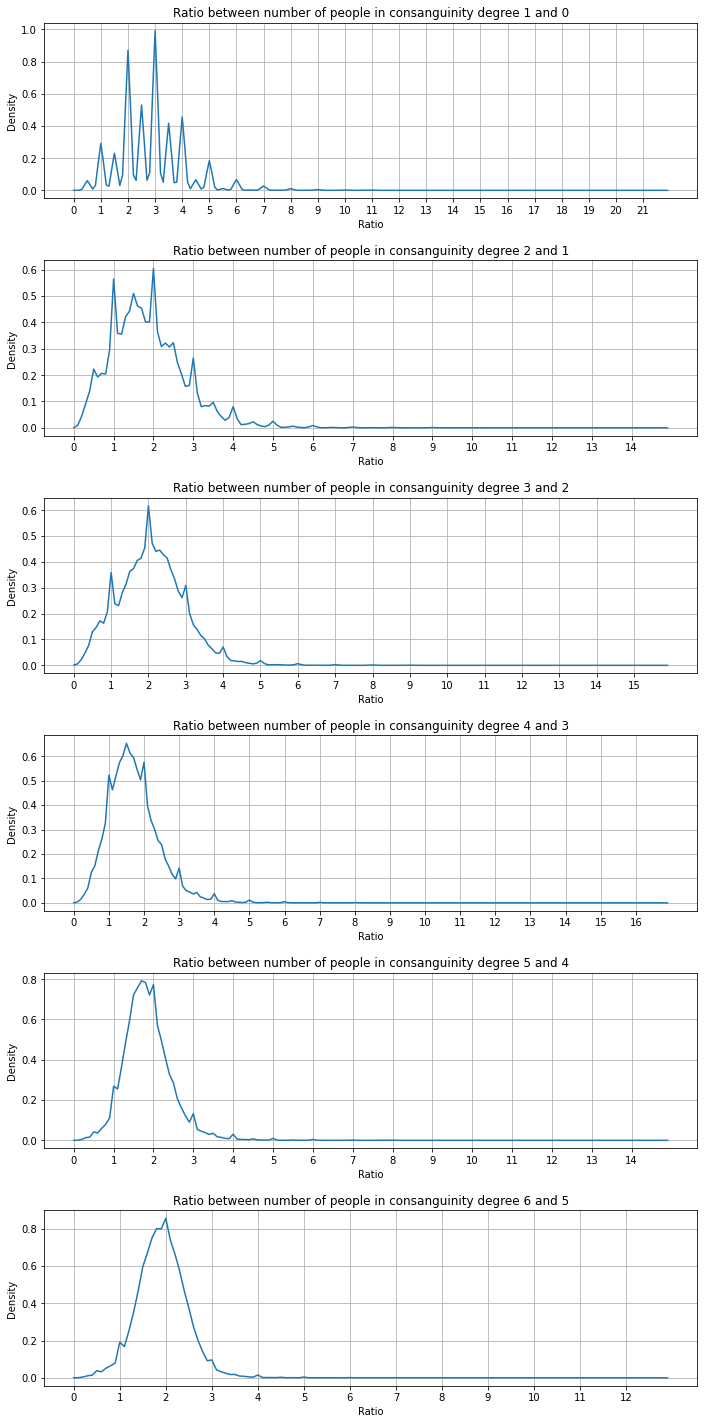

In [177]:
from scipy.stats import gaussian_kde

fig, axs = plt.subplots(
    nrows=density_relatives['degree_separation'].nunique(), 
    ncols=1, figsize=(10, 20))

# create a density plot for each category
for i, (category, data) in enumerate(density_relatives.groupby('degree_separation')):
    density = gaussian_kde(data['ratio'])
    x = np.arange(int(min(data['ratio'])), int(max(data['ratio'])+1), 0.01)
    axs[i].plot(x, density(x))
    title = f"Ratio between number of people in consanguinity degree {category+1} and {category}"
    axs[i].set_title(title)
    axs[i].set_xlabel('Ratio')
    axs[i].set_ylabel('Density')
    axs[i].grid()
    x = np.arange(int(min(data['ratio'])), int(max(data['ratio'])+1))
    axs[i].set_xticks(x)

# adjust the subplots layout and spacing
fig.tight_layout(pad=1.5)

fig.savefig(main_path + 'ratio_density.png', dpi=300)

Strange people

In [178]:
groupby_cols = ['cedula_reference', 'degree_separation']
density_relatives = consang.groupby(
    groupby_cols).count().reset_index(drop=False)

In [180]:
density_relatives = density_relatives.pivot(index = 'cedula_reference', columns = 'degree_separation', values = 'cedula')

In [182]:
density_relatives['total'] = density_relatives.sum(axis=1)

In [184]:
density_relatives[0] = density_relatives[0] / density_relatives['total']
density_relatives[1] = density_relatives[1] / density_relatives['total']
density_relatives[2] = density_relatives[2] / density_relatives['total']
density_relatives[3] = density_relatives[3] / density_relatives['total']
density_relatives[4] = density_relatives[4] / density_relatives['total']
density_relatives[5] = density_relatives[5] / density_relatives['total']
density_relatives[6] = density_relatives[6] / density_relatives['total']

Whole data characteristics

In [196]:
density_relatives.total.mean()

208.29720164101644

In [226]:
base = density_relatives[density_relatives[0] > density_relatives[1]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 22.084320695102686
Max of total 567.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
0089394941207a71,0.007220,0.003610,0.021661,0.072202,0.126354,0.252708,0.516245,277.0,1.0
00dba43dadbea3e3,0.012346,0.006173,0.024691,0.043210,0.111111,0.271605,0.530864,162.0,1.0
01d7940497319305,0.015748,0.007874,0.055118,0.157480,0.133858,0.259843,0.370079,127.0,1.0
060a094d2db25b85,0.009390,0.004695,0.028169,0.070423,0.122066,0.192488,0.572770,213.0,1.0
071c5d3f424d2d44,0.018692,0.009346,0.046729,0.074766,0.084112,0.280374,0.485981,107.0,1.0
...,...,...,...,...,...,...,...,...,...
fc3b5047fc6d8998,0.011494,0.005747,0.017241,0.080460,0.114943,0.206897,0.563218,174.0,1.0
fc818afc5d9f4b85,0.015152,0.007576,0.022727,0.045455,0.174242,0.287879,0.446970,132.0,1.0
fda89837547d4fa6,0.015625,0.007812,0.007812,0.039062,0.085938,0.242188,0.601562,128.0,1.0


In [227]:
base = density_relatives[density_relatives[1] > density_relatives[2]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 66.45400126023945
Max of total 622.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
00076fa7ec2267d1,0.012579,0.044025,0.037736,0.044025,0.125786,0.257862,0.477987,159.0,1.0
000b5b3bbfd3c452,0.010526,0.042105,0.031579,0.073684,0.100000,0.247368,0.494737,190.0,1.0
000e41c550b3cdc0,0.006098,0.024390,0.018293,0.030488,0.097561,0.268293,0.554878,164.0,1.0
002634eb87fcbdfe,0.013333,0.033333,0.026667,0.073333,0.120000,0.286667,0.446667,150.0,1.0
002c03df67db1b49,0.010695,0.032086,0.016043,0.064171,0.106952,0.219251,0.550802,187.0,1.0
...,...,...,...,...,...,...,...,...,...
ffd48ad64a41094b,0.014706,0.036765,0.029412,0.058824,0.088235,0.227941,0.544118,136.0,1.0
ffd84fcec29ab94e,0.010526,0.026316,0.015789,0.084211,0.147368,0.242105,0.473684,190.0,1.0
ffe7802d5fb37c35,0.005917,0.011834,0.005917,0.041420,0.124260,0.254438,0.556213,169.0,1.0


In [228]:
base = density_relatives[density_relatives[2] > density_relatives[3]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 84.33919487956881
Max of total 1123.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
000d2f1c4d10a744,0.010101,0.025253,0.050505,0.030303,0.085859,0.217172,0.580808,198.0,1.0
0010e1c0d4cb711c,0.008475,0.025424,0.093220,0.084746,0.118644,0.220339,0.449153,118.0,1.0
00137b8c58ffb661,0.015152,0.030303,0.083333,0.060606,0.151515,0.265152,0.393939,132.0,1.0
0019978181f2dbc8,0.016667,0.033333,0.091667,0.075000,0.125000,0.216667,0.441667,120.0,1.0
001acb003810c927,0.008333,0.033333,0.075000,0.050000,0.100000,0.233333,0.500000,120.0,1.0
...,...,...,...,...,...,...,...,...,...
ffcdfd50392d62f7,0.009569,0.023923,0.062201,0.052632,0.114833,0.320574,0.416268,209.0,1.0
ffe8e096b055d296,0.019231,0.038462,0.096154,0.067308,0.163462,0.221154,0.394231,104.0,1.0
ffe9bb9537e21e92,0.005602,0.022409,0.072829,0.067227,0.140056,0.274510,0.417367,357.0,1.0


In [229]:
base = density_relatives[density_relatives[3] > density_relatives[4]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 109.79731914152843
Max of total 852.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
000079b1f60645e7,0.008658,0.025974,0.051948,0.129870,0.116883,0.216450,0.450216,231.0,1.0
0006dce3cf465c13,0.011236,0.022472,0.067416,0.117978,0.106742,0.185393,0.488764,178.0,1.0
000a0fe7fa675535,0.007937,0.023810,0.055556,0.174603,0.119048,0.182540,0.436508,126.0,1.0
000b6c2a84a57f6b,0.007752,0.015504,0.054264,0.131783,0.124031,0.217054,0.449612,129.0,1.0
000fbbc870af80d1,0.005780,0.014451,0.040462,0.109827,0.106936,0.187861,0.534682,346.0,1.0
...,...,...,...,...,...,...,...,...,...
fff8ec6cc2361b00,0.006944,0.013889,0.041667,0.076389,0.069444,0.243056,0.548611,144.0,1.0
fffaa8dc48aa607c,0.017391,0.052174,0.052174,0.156522,0.130435,0.173913,0.417391,115.0,1.0
fffcf00cc083edc7,0.006250,0.015625,0.040625,0.128125,0.118750,0.165625,0.525000,320.0,1.0


In [230]:
base = density_relatives[density_relatives[4] > density_relatives[5]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 74.92773122784402
Max of total 881.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
0004c75c70a947a9,0.009091,0.036364,0.118182,0.163636,0.172727,0.163636,0.336364,110.0,1.0
0007510aba1ec398,0.004630,0.013889,0.055556,0.157407,0.212963,0.148148,0.407407,216.0,1.0
000ffc6897532a89,0.005263,0.010526,0.031579,0.089474,0.210526,0.194737,0.457895,190.0,1.0
00135f0238370ee7,0.015625,0.039062,0.085938,0.203125,0.242188,0.156250,0.257812,128.0,1.0
001cf7e509218df2,0.017857,0.044643,0.044643,0.142857,0.178571,0.151786,0.419643,112.0,1.0
...,...,...,...,...,...,...,...,...,...
ff686e145f114a12,0.005618,0.011236,0.033708,0.117978,0.191011,0.185393,0.455056,178.0,1.0
ffa6e550acda11f8,0.018519,0.037037,0.037037,0.092593,0.203704,0.194444,0.416667,108.0,1.0
ffaf527d268f08d6,0.009390,0.032864,0.042254,0.107981,0.253521,0.211268,0.342723,213.0,1.0


In [231]:
base = density_relatives[density_relatives[5] > density_relatives[6]]
print('Mean of total', base.total.mean())
print('Max of total', base.total.max())
base[base.total>100]

Mean of total 48.63391380484483
Max of total 526.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
009e73ef341fa72b,0.007407,0.014815,0.051852,0.088889,0.192593,0.325926,0.318519,135.0,1.0
00c37dae8329694b,0.009901,0.039604,0.079208,0.049505,0.128713,0.356436,0.336634,101.0,1.0
01c609ff6fc0fdfb,0.014493,0.050725,0.057971,0.094203,0.181159,0.304348,0.297101,138.0,1.0
01cbee5e94e52cfb,0.014286,0.050000,0.064286,0.114286,0.214286,0.278571,0.264286,140.0,1.0
01f269103336f7a5,0.009615,0.009615,0.048077,0.076923,0.163462,0.355769,0.336538,104.0,1.0
...,...,...,...,...,...,...,...,...,...
ff0e91a4036f1fc5,0.006289,0.031447,0.075472,0.088050,0.163522,0.320755,0.314465,159.0,1.0
ff10280a08707d94,0.008403,0.025210,0.042017,0.084034,0.193277,0.331933,0.315126,238.0,1.0
ff1ce71c4b75ab52,0.006369,0.025478,0.044586,0.082803,0.165605,0.350318,0.324841,157.0,1.0


Comparison by proportion

In [242]:
PROPORTION = 0.3
base = density_relatives[density_relatives[1] > PROPORTION]
len_1 = len(base)
len_2 = len(base.dropna())
print('Amount of owners without the six levels of consangunity: ', len_1 - len_2)
print('The total amount of people', len_1)
print('Mean total', base.total.mean())
print('Max total', base.total.max())
base[base.total>0.5]

Amount of owners without the six levels of consangunity:  17624
The total amount of people 17889
Mean total 4.848733858795908
Max total 36.0


degree_separation,0,1,2,3,4,5,6,total,prop
cedula_reference,,,,,,,,,
00039a9b6df8ffa8,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,4.0,NaN
0004799e37bfca76,0.333333,0.333333,0.333333,NaN,NaN,NaN,NaN,3.0,NaN
0004c0c41155a45e,0.333333,0.333333,0.333333,NaN,NaN,NaN,NaN,3.0,NaN
00087daac13e1562,0.250000,0.500000,0.250000,NaN,NaN,NaN,NaN,4.0,NaN
00116c6c51d97990,0.200000,0.500000,0.300000,NaN,NaN,NaN,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...
fff700e4c56df11a,0.400000,0.600000,NaN,NaN,NaN,NaN,NaN,5.0,NaN
fff7080b558be2d9,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,4.0,NaN
fffa59d4ec2b7629,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,4.0,NaN


Dropna analysis

In [244]:
print('Amount of owners', len(density_relatives))

Amount of owners 356852


In [246]:
dna_dr = density_relatives.dropna()
print('Amount of owners with people in their six degrees of consanguinity', len(dna_dr))


Amount of owners with people in their six degrees of consanguinity 333041
